python(19556) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
import math
import scipy
from scipy.stats import poisson


# def histogram(data=[], title="", xlabel="None", ylabel="None",
#                    labels=None, bins=None, width=None, alpha=None):
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     plt.hist(data, rwdith=width, bins=bins, alpha=alpha, label=labels)
#     plt.savefig(title+".pdf")
#     plt.show()

# def line_plot(x=[], y=[], title="", xlabel="None", ylabel="None",
#                    log_xscale=True, ylim=None, labels=None):
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     if log_xscale:
#         plt.xscale('log')

#     if ylim:
#         bottom,top=ylim
#         plt.ylim(bottom=bottom, top=top)

#     if isinstance(y[0],list):
#         for i in range(len(y)):
#             plt.plot(x,y[i],label=labels[i])
#         plt.legend()
#     else:
#         plt.plot(x,y)
#     plt.savefig(title+".pdf")
#     plt.show()

# def scatter_plot(x=[], y=[], z=[] title="", xlabel="None", ylabel="None", zlabel="None",
#                    log_xscale=True, log_yscale=False, ylim=None, labels=None):
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)

#     if log_xscale:
#         plt.xscale('log')

#     if log_yscale:
#         plt.yscale('log')

#     if ylim:
#         bottom,top=ylim
#         plt.ylim(bottom=bottom, top=top)

#     sc=[plt.scatter(x,y,c=z,cmap=cm, s=150)]

#     plt.savefig(title+".pdf")
#     plt.show()

## Line Plot

In [31]:
def line_plot(fileName="", x = "", y = "", figureName = "", xscale = True, xlabel = "", ylabel = "", iter=False, bound=True) :
    df = pd.read_csv('./out/'+fileName+'.csv')
    # print(df)
    
    df['FilterType'] = df['FilterType'].astype(str)
    bloom = df[df['FilterType'] == 'Bloom']
    cuckoo = df[df['FilterType'] == 'Cuckoo']
    xor = df[df['FilterType'] == 'Xor']
    blockedbloom = df[df['FilterType'] == 'Blocked Bloom']
    theory = df[df['FilterType'] == 'Lower Bound']

    x_values = df[x].unique()
    print(x_values)
    if iter:
        bloom = bloom.groupby(x)[y].mean().reset_index()
        cuckoo = cuckoo.groupby(x)[y].mean().reset_index()
        xor = xor.groupby(x)[y].mean().reset_index()
        blockedbloom = blockedbloom.groupby(x)[y].mean().reset_index()
    
    print(df['FilterType'].unique())
    plt.figure()

    if xscale:
        plt.xscale('log')
    
    plt.plot(bloom[x], bloom[y], label='BloomFilter')
    plt.plot(cuckoo[x], cuckoo[y], label='CuckooFilter')
    plt.plot(blockedbloom[x], blockedbloom[y], label='BlockedBloomFilter')
    plt.plot(xor[x], xor[y], label='XORFilter')
    if bound:
        plt.plot(theory[x], theory[y], label='Lower Bound', linestyle = '--')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(figureName)
    plt.xticks(x_values, labels=x_values)
    plt.legend()
    
    plt.savefig("./out/"+ fileName + ".pdf")
    
    plt.show()

[0.0001 0.001  0.01   0.1   ]
['Bloom' 'Cuckoo' 'Xor' 'Blocked Bloom' 'Lower Bound']


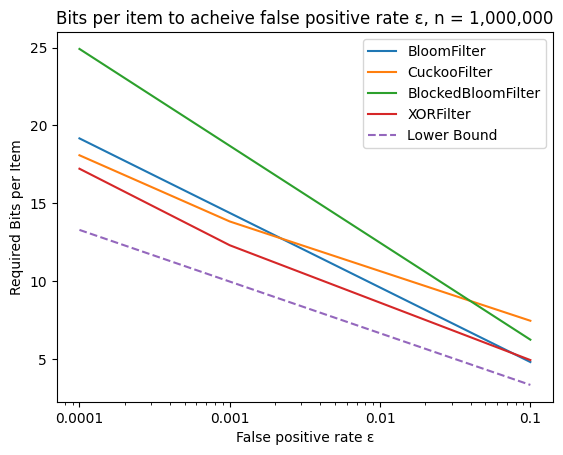

In [32]:
line_plot(fileName="bpi_fpr", x="fpr", y="bpi", figureName='Bits per item to acheive false positive rate ε, n = 1,000,000', 
          xscale=True, xlabel="False positive rate ε", ylabel="Required Bits per Item", bound=True)

# line_plot(fileName="buildTime_n", x="n", y="constTime", figureName='Construction time in terms of number of keys', 
#           xscale=True, xlabel="Number of Keys Inserted", ylabel="Construction time per key (ns)")



[  10000.  100000. 1000000.      nan]
['Bloom' 'Cuckoo' 'Blocked Bloom' 'Xor']


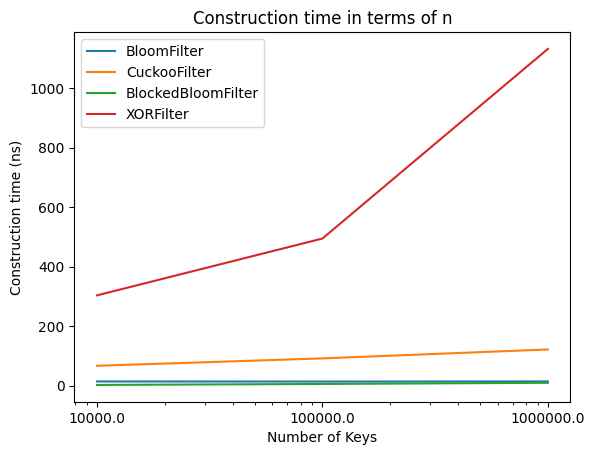

In [33]:
line_plot(fileName="buildTime_n", x="n", y="constTime", figureName='Construction time in terms of n', 
          xscale=True, xlabel="Number of Keys", ylabel="Construction time (ns)", iter=True, bound=False)

## Bar Plot

In [34]:
def bar_plot(fileName="", x = "", y = "", figureName = "", xscale = True, xlabel = "", ylabel = "", iter=False, bound=True) :
    df = pd.read_csv('./out/' + fileName + '.csv')
    
    df['FilterType'] = df['FilterType'].astype(str)
    if iter:
        grouped = df.groupby(['FilterType', x])[y].agg(['mean', 'std', 'count']).reset_index()
        grouped['stderr'] = grouped['std'] / np.sqrt(grouped['count'])
    else:
        grouped = df.copy()
        grouped['stderr'] = 0  # Assuming no error if not iterating

    x_values = df[x].unique()
    x_pos = np.arange(len(x_values))
    width = 0.2

    plt.figure()

    if xscale:
        plt.xscale('log')

    filter_colors = {
        'Bloom': 'red',
        'Cuckoo': 'orange',
        'Blocked Bloom': 'blue',
        'Xor': 'green'
    }
    legend_added = []

    for i, xval in enumerate(x_values):
        for j, ftype in enumerate(['Bloom', 'Cuckoo', 'Blocked Bloom', 'Xor']):
            subset = grouped[(grouped['FilterType'] == ftype) & (grouped[x] == xval)]
            if not subset.empty:
                plt.bar(i - width * 1.5 + j * width, subset['mean'].values[0], width,
                        color=filter_colors[ftype],  # Set color for each filter type
                        yerr=subset['stderr'].values[0], label=ftype if ftype not in legend_added else "", capsize=5)
                if ftype not in legend_added:
                    legend_added.append(ftype)
    plt.xticks(x_pos, labels=np.round(x_values, 2))
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(figureName)
    plt.legend()
    
    plt.savefig("./out/"+ fileName + ".pdf")
    
    plt.show()

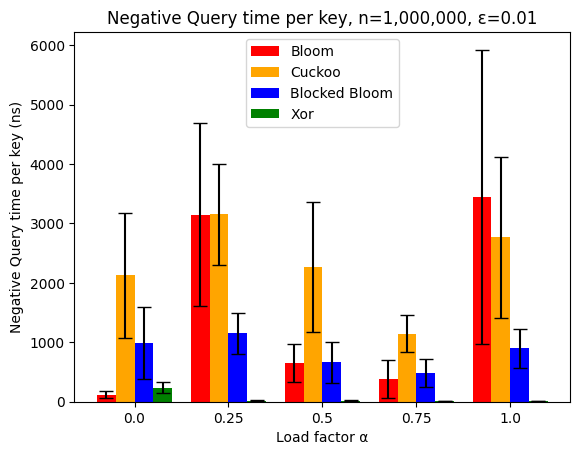

In [35]:
bar_plot(fileName="lf_negQueryTime", x="lf", y="queryTime", figureName='Negative Query time per key, n=1,000,000, ε=0.01', 
          xscale=False, xlabel="Load factor α", ylabel="Negative Query time per key (ns)", iter=True, bound=False)

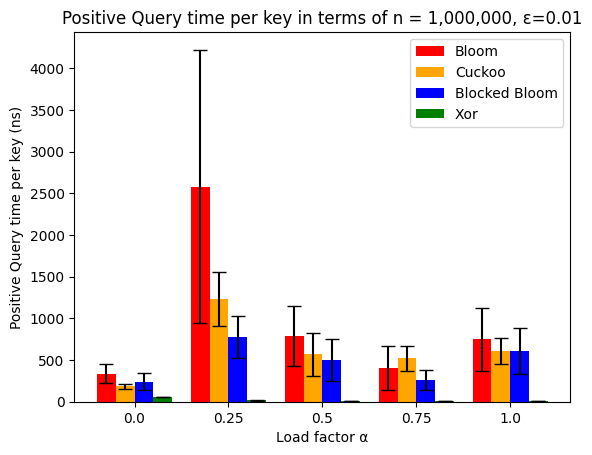

In [36]:
bar_plot(fileName="lf_posQueryTime", x="lf", y="queryTime", figureName='Positive Query time per key in terms of n = 1,000,000, ε=0.01', 
          xscale=False, xlabel="Load factor α", ylabel="Positive Query time per key (ns)", iter=True, bound=False)

## Bar plot without labeled x

In [37]:
def bar_plot_no_x(fileName="", x = "", y = "", figureName = "", xscale = True, xlabel = "", ylabel = "", iter=False, bound=True) :
    df = pd.read_csv('./out/' + fileName + '.csv')
    
    # Check if we need to aggregate data and calculate errors
    if iter:
        # Compute mean and standard error if there are multiple observations
        grouped = df.groupby('FilterType').agg(
            mean=(y, 'mean'),
            stderr=(y, 'std')
        )
        # Standard Error of the Mean (SEM)
        grouped['stderr'] = grouped['stderr'] / np.sqrt(df.groupby('FilterType').size())
    else:
        # If no iteration over multiple datasets, just use the data as is
        grouped = df.copy()
        grouped.rename(columns={y: 'mean'}, inplace=True)
        grouped['stderr'] = 0  # No error bars if there's no iteration

    # Set the colors for each filter type
    filter_colors = {
        'Bloom': 'red',
        'Cuckoo': 'orange',
        'Blocked Bloom': 'blue',
        'Xor': 'green'
    }

    plt.figure(figsize=(10, 6))
    x_pos = np.arange(len(grouped))

    # Create a bar chart
    bars = plt.bar(x_pos, grouped['mean'], yerr=grouped['stderr'], color=[filter_colors[ftype] for ftype in grouped.index], capsize=5)

    # Adding labels for each bar
    plt.xticks(x_pos, grouped.index, rotation=45)

    # Set scales and labels
    if xscale:
        plt.xscale('log')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(figureName)

    # Optional horizontal reference line
    if bound:
        plt.axhline(y=0.01, color='gray', linestyle='--', label='Target False Positive, ε = 0.01')
        
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    plt.savefig("./out/"+ fileName + ".pdf")

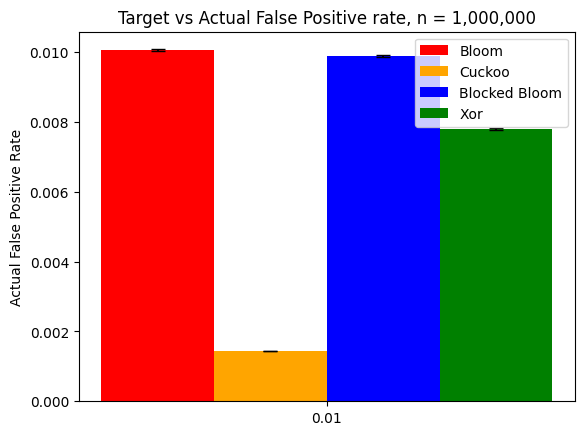

In [38]:
bar_plot(fileName="target_actual_fpr", x="target", y="actual", figureName='Target vs Actual False Positive rate, n = 1,000,000', 
          xscale=False, xlabel="", ylabel="Actual False Positive Rate", iter=True, bound=True)

    FilterType            n       fpr  targetFpr  iteration
0        Bloom      10000.0  0.001100      0.001          0
1        Bloom      10000.0  0.001100      0.001          1
2        Bloom      10000.0  0.001300      0.001          2
3        Bloom      10000.0  0.000900      0.001          3
4        Bloom      10000.0  0.000300      0.001          4
..         ...          ...       ...        ...        ...
145      Bloom  100000000.0  0.102618      0.100          5
146      Bloom  100000000.0  0.102638      0.100          6
147      Bloom  100000000.0  0.102636      0.100          7
148      Bloom  100000000.0  0.102624      0.100          8
149      Bloom  100000000.0  0.102660      0.100          9

[150 rows x 5 columns]
0    7.943282e+03
1    7.943282e+04
2    7.943282e+05
3    7.943282e+06
4    7.943282e+07
Name: n, dtype: float64
5    7.943282e+03
6    7.943282e+04
7    7.943282e+05
8    7.943282e+06
9    7.943282e+07
Name: n, dtype: float64
10    7.943282e+03
11    7.9

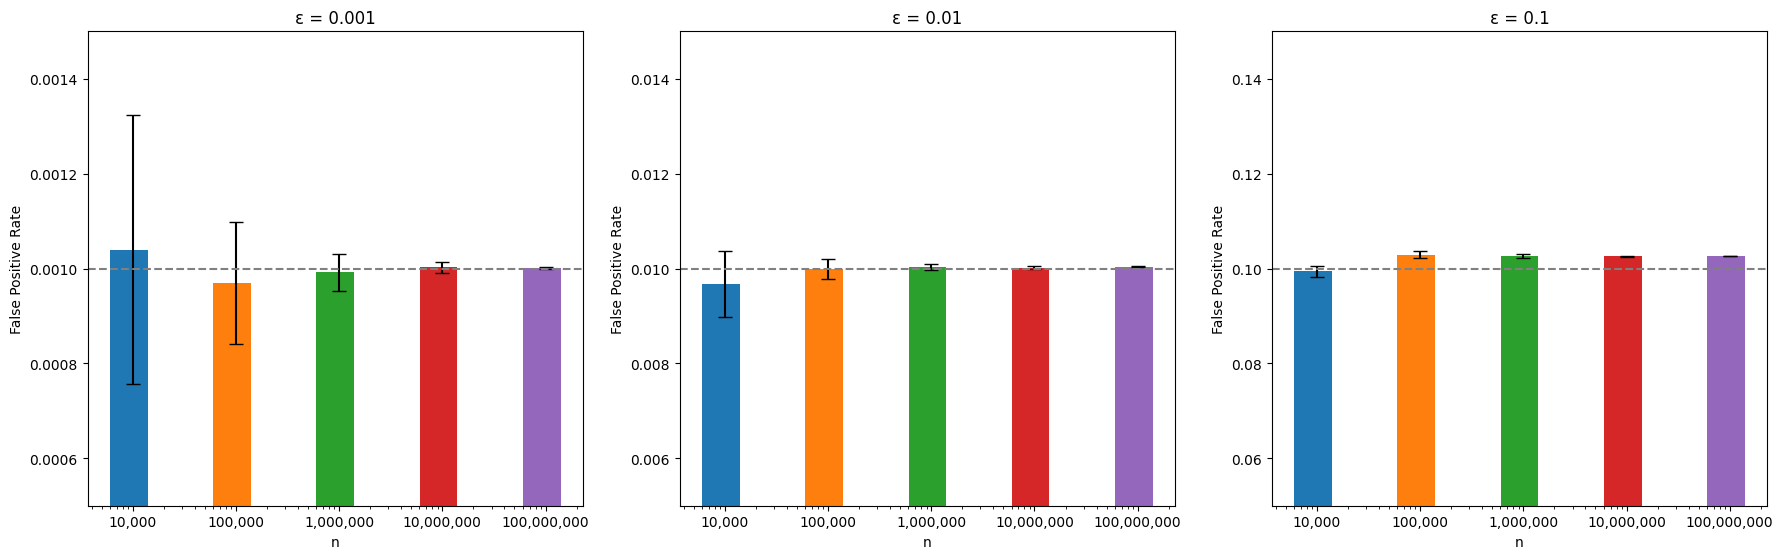

In [131]:
df = pd.read_csv('out/report/bloom_n_fpr.csv')
print(df)
df.columns = ['FilterType', 'n', 'fpr', 'targetFpr', 'iteration']

grouped_stats = df.groupby(['targetFpr', 'n']).agg({
    'fpr': ['mean', 'std']
}).reset_index()
grouped_stats.columns = ['targetFpr', 'n', 'fpr_mean', 'fpr_std']

unique_ns = sorted(df['n'].unique())
color_map = {n: plt.cm.tab10(i) for i, n in enumerate(unique_ns)}

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=len(df['targetFpr'].unique()), figsize=(18, 6), sharey=False)
# fig.suptitle('Comparison of ε vs Measured False Positive Rate')

y_axis_ranges = {
    0.001: (0.0005, 0.0015),
    0.01: (0.005, 0.015),
    0.1: (0.05, 0.15)
}

for ax, target_fpr in zip(axes, sorted(df['targetFpr'].unique())):
    subset = grouped_stats[grouped_stats['targetFpr'] == target_fpr]
    subset = subset.sort_values(by='n')
    
    log_widths = np.diff(np.log10(subset['n'].to_numpy())).mean() * 0.1
    bar_widths = 10 ** (np.log10(subset['n']) - log_widths)
    print(bar_widths)
    for idx, row in subset.iterrows():
        ax.bar(row['n'], row['fpr_mean'], width=bar_widths[idx], yerr=row['fpr_std'], color=color_map[row['n']], capsize=5)
    ax.axhline(y=target_fpr, color='gray', linestyle='--')
    
    ax.set_xscale('log')
    ax.set_title(f'ε = {target_fpr}')
    ax.set_xlabel('n')
    ax.set_xticks(subset['n'])
    ax.set_xticklabels([f"{int(x):,}" for x in subset['n']])
    ax.set_ylabel('False Positive Rate')
    ax.set_ylim(*y_axis_ranges[target_fpr])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# fig.legend(by_label.values(), by_label.keys(), loc='upper center', ncol=len(color_map), bbox_to_anchor=(0.5, 1.02))

plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()

plt.savefig("./out/report/bloom_n_fpr" + ".png")

In [147]:
df = pd.read_csv('out/report/bloom_m_fpr.csv')
print(df)
df.columns = ['FilterType', 'm', 'fpr', 'targetFpr', 'iteration']

grouped = df.groupby(['targetFpr', 'm']).agg(average_fpr=('fpr', 'mean')).reset_index()
print(grouped)

    FilterType    m       fpr  targetFpr  iteration
0        Bloom  8.0  0.001141      0.001          0
1        Bloom  8.0  0.001103      0.001          1
2        Bloom  8.0  0.001139      0.001          2
3        Bloom  8.0  0.001096      0.001          3
4        Bloom  8.0  0.001128      0.001          4
..         ...  ...       ...        ...        ...
220      Bloom  6.0  0.131898      0.100         10
221      Bloom  6.0  0.132930      0.100         11
222      Bloom  6.0  0.133060      0.100         12
223      Bloom  6.0  0.132012      0.100         13
224      Bloom  6.0  0.132220      0.100         14

[225 rows x 5 columns]
    targetFpr     m  average_fpr
0       0.001   8.0     0.001122
1       0.001   9.0     0.001028
2       0.001  10.0     0.001003
3       0.001  11.0     0.001019
4       0.001  12.0     0.001032
5       0.010   5.0     0.011134
6       0.010   6.0     0.010186
7       0.010   7.0     0.010059
8       0.010   8.0     0.010556
9       0.010   9.0   

In [529]:
df = pd.read_csv('out/report/bloom_m_constTime.csv')
print(df)
df.columns = ['FilterType', 'm', 'constTime', 'targetFpr', 'iteration']

grouped = df.groupby(['targetFpr', 'm']).agg(average_time=('constTime', 'mean'), std_time=('constTime', 'std')).reset_index()
print(grouped)

    FilterType    m  constTime  targetFpr  iteration
0        Bloom  8.0  18.500167      0.001          0
1        Bloom  8.0  17.449125      0.001          1
2        Bloom  8.0  17.765625      0.001          2
3        Bloom  8.0  17.424209      0.001          3
4        Bloom  8.0  40.650417      0.001          4
..         ...  ...        ...        ...        ...
220      Bloom  6.0  12.374584      0.100         10
221      Bloom  6.0  11.934750      0.100         11
222      Bloom  6.0  12.313417      0.100         12
223      Bloom  6.0  11.910166      0.100         13
224      Bloom  6.0  12.235917      0.100         14

[225 rows x 5 columns]
    targetFpr     m  average_time   std_time
0       0.001   8.0     32.355008  14.418379
1       0.001   9.0     26.991875  11.632166
2       0.001  10.0     21.610906   2.716028
3       0.001  11.0     28.139672  15.825858
4       0.001  12.0     27.580928   7.826867
5       0.010   5.0     11.194061   1.583458
6       0.010   6.0     1

In [530]:
df = pd.read_csv('out/report/bloom_m_queryTime.csv')
print(df)
df.columns = ['FilterType', 'm', 'queryTime', 'targetFpr', 'iteration']

grouped = df.groupby(['targetFpr', 'm']).agg(average_time=('queryTime', 'mean'), std_time=('queryTime', 'std')).reset_index()
print(grouped)

    FilterType    m  constTime  targetFpr  iteration
0        Bloom  8.0  18.547709      0.001          0
1        Bloom  8.0  18.332834      0.001          1
2        Bloom  8.0  17.988750      0.001          2
3        Bloom  8.0  18.409791      0.001          3
4        Bloom  8.0  18.118917      0.001          4
..         ...  ...        ...        ...        ...
220      Bloom  6.0  17.854375      0.100         10
221      Bloom  6.0  17.960083      0.100         11
222      Bloom  6.0  17.734375      0.100         12
223      Bloom  6.0  17.915000      0.100         13
224      Bloom  6.0  18.078458      0.100         14

[225 rows x 5 columns]
    targetFpr     m  average_time  std_time
0       0.001   8.0     18.270103  0.367585
1       0.001   9.0     20.039264  0.113602
2       0.001  10.0     21.944042  0.232088
3       0.001  11.0     23.486417  0.241056
4       0.001  12.0     24.370117  0.181506
5       0.010   5.0     14.834705  0.264760
6       0.010   6.0     17.16159

    FilterType    b     alpha           n  iteration
0       Cuckoo  1.0  0.362400     10000.0          0
1       Cuckoo  1.0  0.280800     10000.0          1
2       Cuckoo  1.0  0.257600     10000.0          2
3       Cuckoo  1.0  0.435800     10000.0          3
4       Cuckoo  1.0  0.423700     10000.0          4
..         ...  ...       ...         ...        ...
275     Cuckoo  8.0  0.624730  10000000.0          5
276     Cuckoo  8.0  0.654116  10000000.0          6
277     Cuckoo  8.0  0.635682  10000000.0          7
278     Cuckoo  8.0  0.615646  10000000.0          8
279     Cuckoo  8.0  0.654119  10000000.0          9

[280 rows x 5 columns]
      b           n  mean_alpha  std_alpha
0   1.0     10000.0    0.340270   0.075928
1   1.0     50000.0    0.296724   0.047471
2   1.0    100000.0    0.243597   0.047816
3   1.0    500000.0    0.193102   0.014834
4   1.0   1000000.0    0.191690   0.027118
5   1.0   5000000.0    0.153353   0.024676
6   1.0  10000000.0    0.130622   0.022

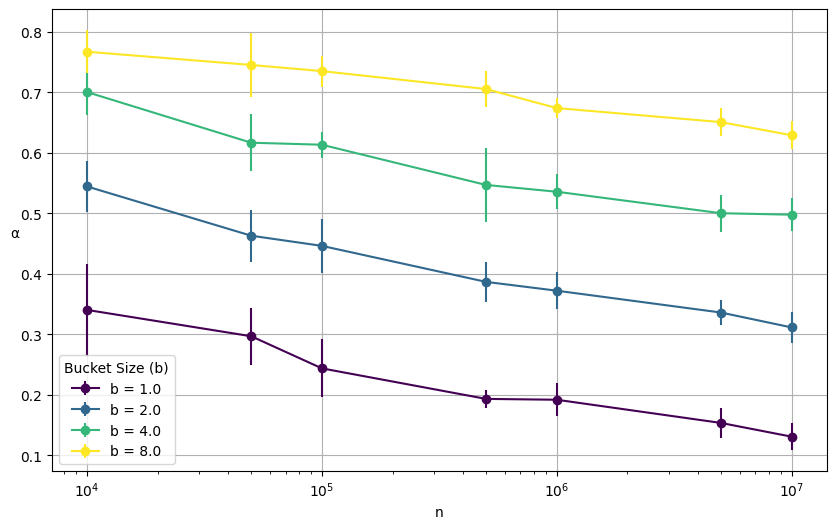

In [363]:
df = pd.read_csv('out/report/cuckoo_b_alpha_n.csv')
print(df)
df.columns = ['FilterType', 'b', 'alpha', 'n', 'iteration']


grouped = df.groupby(['b', 'n']).agg(mean_alpha=('alpha', 'mean'), std_alpha=('alpha', 'std')).reset_index()

print(grouped)

# Find unique values of 'b'
b_values = grouped['b'].unique()

# Setup colors or markers, ensuring there are enough for each 'b' value
colors = plt.cm.viridis(np.linspace(0, 1, len(b_values)))  # Using a colormap for color coding

# Create a single plot
plt.figure(figsize=(10, 6))

for b, color in zip(b_values, colors):
    # Filter the grouped data for the current value of 'b'
    subset = grouped[grouped['b'] == b]

    # Plot error bars for the current subset
    plt.errorbar(subset['n'], subset['mean_alpha'], yerr=subset['std_alpha'], fmt='o-', color=color, label=f'b = {b}')

plt.xlabel('n')
plt.ylabel('α', rotation=0)
plt.xscale('log')

plt.grid(True)
plt.legend(title='Bucket Size (b)')
plt.savefig("./out/cuckoo_b_gamma_n.png")
plt.show()

    FilterType    b     alpha           n  iteration
0       Cuckoo  1.0  0.362400     10000.0          0
1       Cuckoo  1.0  0.280800     10000.0          1
2       Cuckoo  1.0  0.257600     10000.0          2
3       Cuckoo  1.0  0.435800     10000.0          3
4       Cuckoo  1.0  0.423700     10000.0          4
..         ...  ...       ...         ...        ...
275     Cuckoo  8.0  0.624730  10000000.0          5
276     Cuckoo  8.0  0.654116  10000000.0          6
277     Cuckoo  8.0  0.635682  10000000.0          7
278     Cuckoo  8.0  0.615646  10000000.0          8
279     Cuckoo  8.0  0.654119  10000000.0          9

[280 rows x 5 columns]
      b           n  mean_alpha  std_alpha        ma
0   1.0     10000.0    0.340270   0.075928  2.938843
1   1.0     50000.0    0.296724   0.047471  3.370135
2   1.0    100000.0    0.243597   0.047816  4.105141
3   1.0    500000.0    0.193102   0.014834  5.178605
4   1.0   1000000.0    0.191690   0.027118  5.216764
5   1.0   5000000.0   

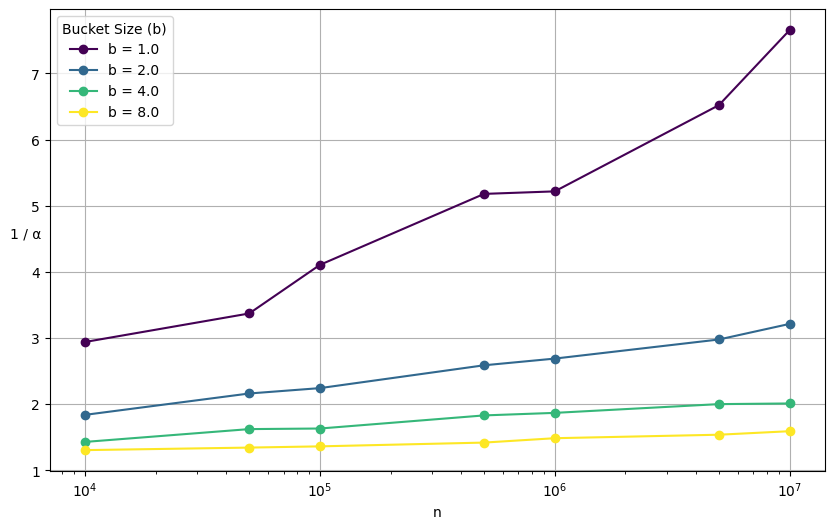

In [364]:
df = pd.read_csv('out/report/cuckoo_b_alpha_n.csv')
print(df)
df.columns = ['FilterType', 'b', 'alpha', 'n', 'iteration']


grouped = df.groupby(['b', 'n']).agg(mean_alpha=('alpha', 'mean'), std_alpha=('alpha', 'std')).reset_index()

# Find unique values of 'b'
b_values = grouped['b'].unique()

# Setup colors or markers, ensuring there are enough for each 'b' value
colors = plt.cm.viridis(np.linspace(0, 1, len(b_values)))  # Using a colormap for color coding

# Create a single plot
plt.figure(figsize=(10, 6))

for b, color in zip(b_values, colors):
    # Filter the grouped data for the current value of 'b'
    subset = grouped[grouped['b'] == b]

    # Plot error bars for the current subset
    plt.errorbar(subset['n'], 1 / subset['mean_alpha'], fmt='o-', color=color, label=f'b = {b}')

grouped['ma'] = 1 / grouped['mean_alpha']

print(grouped)

plt.xlabel('n')
plt.ylabel('1 / α', rotation=0)
plt.xscale('log')

plt.grid(True)
plt.legend(title='Bucket Size (b)')
plt.savefig("./out/cuckoo_b_alpha_n.png")
plt.show()

In [531]:
df = pd.read_csv('out/report/cuckoo_b_failure.csv')
print(df)
# df.columns = ['FilterType', 'b', 'failure', 'n', 'calculated']

grouped = df.groupby(['b']).agg(mean_failure=('failure', 'mean'), std_failure=('failure', 'std')).reset_index()
print(grouped)

   FilterType    b   failure          n  calculated
0      Cuckoo  1.0  0.062067  1000000.0           0
1      Cuckoo  1.0  0.060411  1000000.0           0
2      Cuckoo  1.0  0.059652  1000000.0           0
3      Cuckoo  1.0  0.062250  1000000.0           0
4      Cuckoo  1.0  0.058989  1000000.0           0
5      Cuckoo  1.0  0.062702  1000000.0           0
6      Cuckoo  1.0  0.063502  1000000.0           0
7      Cuckoo  1.0  0.062355  1000000.0           0
8      Cuckoo  1.0  0.058492  1000000.0           0
9      Cuckoo  1.0  0.058889  1000000.0           0
10     Cuckoo  2.0  0.000142  1000000.0           0
11     Cuckoo  2.0  0.000139  1000000.0           0
12     Cuckoo  2.0  0.000162  1000000.0           0
13     Cuckoo  2.0  0.000141  1000000.0           0
14     Cuckoo  2.0  0.000140  1000000.0           0
15     Cuckoo  2.0  0.000161  1000000.0           0
16     Cuckoo  2.0  0.000146  1000000.0           0
17     Cuckoo  2.0  0.000154  1000000.0           0
18     Cucko

In [299]:
n = 1_000_000
desired_fpr = 0.01
r = 7
B = 512

def factorial(n):
    if n <= 1:
        return 1
    else:
        return n*factorial(n-1)

# Calculate Bloom Filter's bits per item
bloom_bits_per_item = 9.5671
total_bloom_bits = bloom_bits_per_item * n

def calculate_bbf_fpr(l, B, r, n):
    lambda_ = n / l
    sum_fpr = 0
    max_range = int(3 * lambda_) + 1  # Ensuring coverage of significant terms
    for i in range(40):
        poisson_prob = poisson.pmf(i, lambda_)
        local_fpr = 1 - exp(-r * i / B)
        sum_fpr += poisson_prob * local_fpr * 1.05
    return sum_fpr

# # Test the function with an increased beta
# test_beta = 1.21
# l = ceil((bloom_bits_per_item * test_beta * n) / B)
# test_fpr = calculate_bbf_fpr(l, B, r, n)
# test_fpr

beta = 1.0
found = False
while not found:
    l = ceil((bloom_bits_per_item * beta * n) / B)
    bbf_fpr = calculate_bbf_fpr(l*64, B, r, n)
    if bbf_fpr <= desired_fpr:
        found = True
    else:
        beta += 0.01  # Increment beta

beta, bbf_fpr

(1.1900000000000002, 0.009970698087550712)

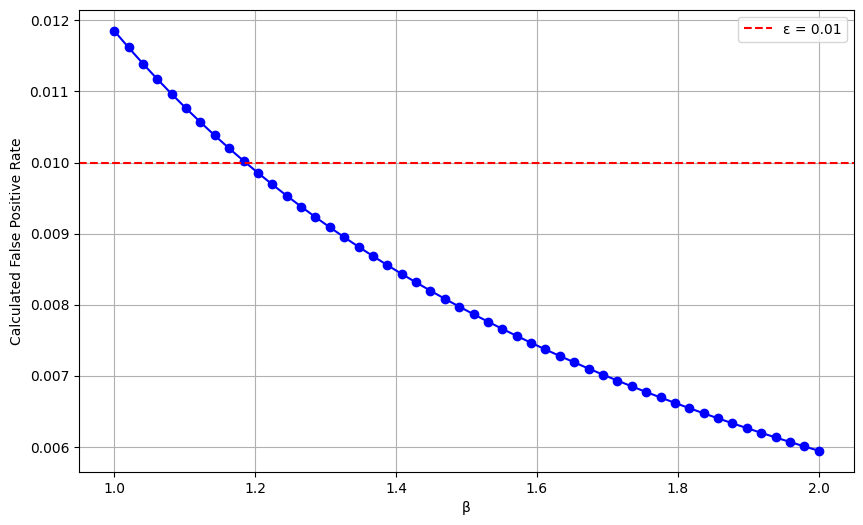

In [327]:
beta_values = np.linspace(1, 2, 50)
fpr_values = []

# Recalculate FPR for each beta value using the new function
for beta in beta_values:
    l = ceil((bloom_bits_per_item * beta * n * 64) / B)
    fpr = calculate_bbf_fpr(l, B, r, n)
    fpr_values.append(fpr)

# Plotting the updated graph with new FPR calculations
plt.figure(figsize=(10, 6))
plt.plot(beta_values, fpr_values, marker='o', linestyle='-', color='b')
plt.xlabel('β')
plt.ylabel('Calculated False Positive Rate')
plt.grid(True)
plt.axhline(y=0.01, color='r', linestyle='--', label='ε = 0.01')
plt.legend()
plt.savefig("./out/"+ "calculated_bbf_fpr" + ".png")

    beta  mean_fpr   std_fpr
0   1.14  0.011704  0.000083
1   1.15  0.011518  0.000117
2   1.16  0.011433  0.000107
3   1.17  0.011250  0.000088
4   1.18  0.011124  0.000095
5   1.19  0.011033  0.000085
6   1.20  0.010914  0.000095
7   1.21  0.010788  0.000094
8   1.22  0.010673  0.000083
9   1.23  0.010578  0.000091
10  1.24  0.010475  0.000128
11  1.25  0.010322  0.000095
12  1.26  0.010280  0.000139
13  1.27  0.010137  0.000131
14  1.28  0.010057  0.000143
15  1.29  0.009923  0.000078
16  1.30  0.009829  0.000097


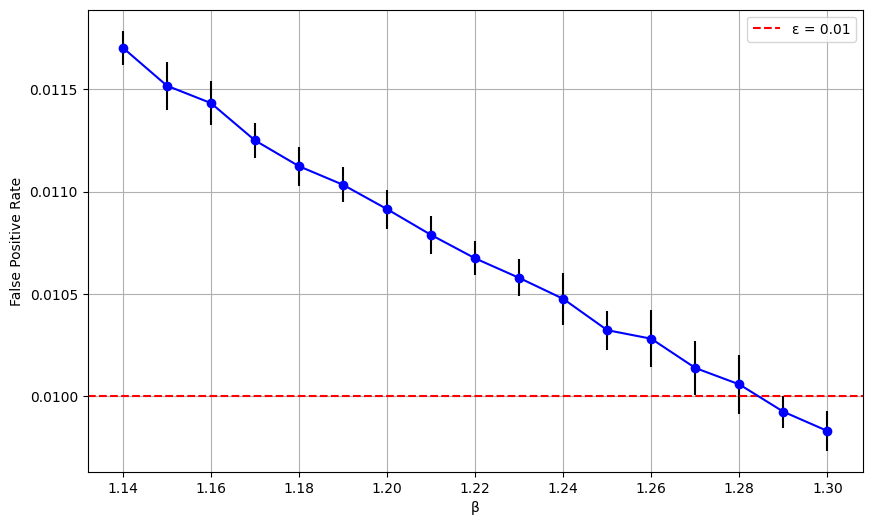

In [326]:
df = pd.read_csv('out/report/bB_beta_fpr.csv')

# Renaming columns if necessary
df.columns = ['FilterType', 'beta', 'fpr', 'n', 'calculated']

# Grouping by beta and calculating mean and standard deviation
grouped = df.groupby('beta').agg(mean_fpr=('fpr', 'mean'), std_fpr=('fpr', 'std')).reset_index()
print(grouped)

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(grouped['beta'], grouped['mean_fpr'], yerr=grouped['std_fpr'], marker='o', linestyle='-', color='b', ecolor='black')
plt.xlabel('β')
plt.ylabel('False Positive Rate')
plt.grid(True)
plt.axhline(y=0.01, color='r', linestyle='--', label='ε = 0.01')
plt.legend()
plt.savefig("./out/"+ "bB_beta_fpr" + ".png")

In [333]:
df = pd.read_csv('out/report/cuckoo_b_fpr.csv')
print(df)
# df.columns = ['FilterType', 'b', 'failure', 'n', 'calculated']

grouped = df.groupby(['b']).agg(mean_fpr=('fpr', 'mean')).reset_index()
print(grouped)

   FilterType    b       fpr  targetFpr  iteration
0      Cuckoo  1.0  0.420688        0.5          0
1      Cuckoo  1.0  0.419984        0.5          1
2      Cuckoo  1.0  0.420185        0.5          2
3      Cuckoo  1.0  0.419576        0.5          3
4      Cuckoo  1.0  0.420557        0.5          4
5      Cuckoo  1.0  0.419393        0.5          5
6      Cuckoo  1.0  0.419663        0.5          6
7      Cuckoo  1.0  0.419688        0.5          7
8      Cuckoo  1.0  0.420654        0.5          8
9      Cuckoo  1.0  0.420228        0.5          9
10     Cuckoo  1.0  0.420173        0.5         10
11     Cuckoo  1.0  0.419702        0.5         11
12     Cuckoo  1.0  0.421560        0.5         12
13     Cuckoo  1.0  0.419707        0.5         13
14     Cuckoo  1.0  0.420459        0.5         14
15     Cuckoo  2.0  0.391336        0.5          0
16     Cuckoo  2.0  0.392216        0.5          1
17     Cuckoo  2.0  0.391704        0.5          2
18     Cuckoo  2.0  0.392683   

In [383]:
df = pd.read_csv('out/report/cuckoo_b_fpr.csv')
print(df)
# df.columns = ['FilterType', 'b', 'failure', 'n', 'calculated']

grouped = df.groupby(['b', 'n']).agg(mean_fpr=('fpr', 'mean')).reset_index()
print(grouped)

   FilterType    b       fpr  targetFpr  iteration
0      Cuckoo  1.0  0.420688        0.5          0
1      Cuckoo  1.0  0.419984        0.5          1
2      Cuckoo  1.0  0.420185        0.5          2
3      Cuckoo  1.0  0.419576        0.5          3
4      Cuckoo  1.0  0.420557        0.5          4
5      Cuckoo  1.0  0.419393        0.5          5
6      Cuckoo  1.0  0.419663        0.5          6
7      Cuckoo  1.0  0.419688        0.5          7
8      Cuckoo  1.0  0.420654        0.5          8
9      Cuckoo  1.0  0.420228        0.5          9
10     Cuckoo  1.0  0.420173        0.5         10
11     Cuckoo  1.0  0.419702        0.5         11
12     Cuckoo  1.0  0.421560        0.5         12
13     Cuckoo  1.0  0.419707        0.5         13
14     Cuckoo  1.0  0.420459        0.5         14
15     Cuckoo  2.0  0.391336        0.5          0
16     Cuckoo  2.0  0.392216        0.5          1
17     Cuckoo  2.0  0.391704        0.5          2
18     Cuckoo  2.0  0.392683   

KeyError: 'n'

    FilterType    b   queryTime  targetFpr         n
0       Cuckoo  1.0   21.800000       0.01     10000
1       Cuckoo  1.0   22.016700       0.01     10000
2       Cuckoo  1.0   21.841700       0.01     10000
3       Cuckoo  1.0   22.258300       0.01     10000
4       Cuckoo  1.0   21.550000       0.01     10000
..         ...  ...         ...        ...       ...
415     Cuckoo  8.0  202.884571       0.01  10000000
416     Cuckoo  8.0  201.419658       0.01  10000000
417     Cuckoo  8.0  200.956108       0.01  10000000
418     Cuckoo  8.0  200.117258       0.01  10000000
419     Cuckoo  8.0  200.041754       0.01  10000000

[420 rows x 5 columns]
      b         n   mean_time   std_time
0   1.0     10000   21.761667   0.208821
1   1.0     50000   37.780387  19.514265
2   1.0    100000   88.384889  88.611873
3   1.0    500000  149.257277  99.682250
4   1.0   1000000  134.911525  36.099947
5   1.0   5000000  108.024900  10.956150
6   1.0  10000000   93.211286   8.441027
7   2.0     

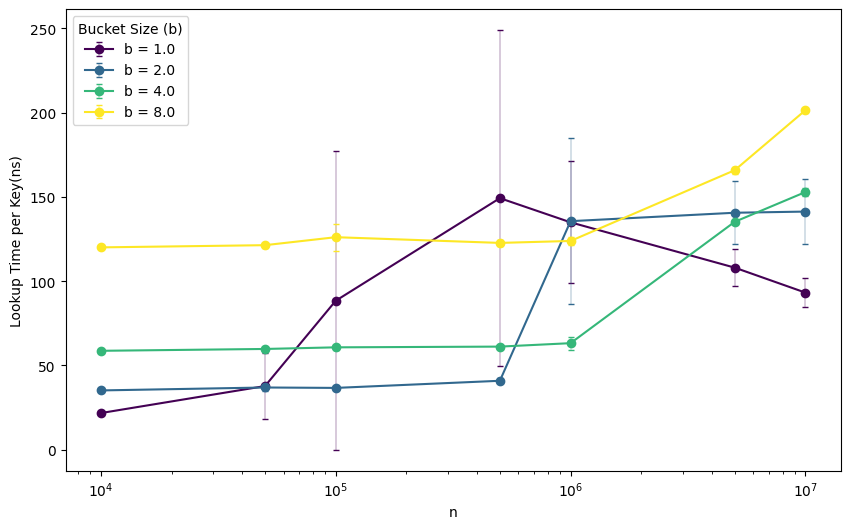

In [376]:
df = pd.read_csv('out/report/cuckoo_b_queryTime.csv')
print(df)
df.columns = ['FilterType', 'b', 'queryTime', 'targetFpr', 'n']


grouped = df.groupby(['b', 'n']).agg(mean_time=('queryTime', 'mean'), std_time=('queryTime', 'std')).reset_index()
b_values = grouped['b'].unique()


colors = plt.cm.viridis(np.linspace(0, 1, len(b_values))) 

plt.figure(figsize=(10, 6))

for b, color in zip(b_values, colors):
    subset = grouped[grouped['b'] == b]

    plt.errorbar(subset['n'], subset['mean_time'], yerr=subset['std_time'],
             fmt='o-', color=color, label=f'b = {b}',
             ecolor=color, elinewidth=0.3, capsize=2, capthick=1)

print(grouped)

plt.xlabel('n')
plt.ylabel('Lookup Time per Key(ns)', rotation=90)
plt.xscale('log')

plt.legend(title='Bucket Size (b)')
plt.savefig("./out/cuckoo_b_queryTime.png")
plt.show()

In [532]:
df = pd.read_csv('out/report/cuckoo_f_fpr.csv')
print(df)
# df.columns = ['FilterType', 'b', 'failure', 'n', 'calculated']

grouped = df.groupby(['targetFpr', 'f']).agg(mean_fpr=('fpr', 'mean'), std_fpr=('fpr', 'std')).reset_index()
print(grouped)

    FilterType     f       fpr  targetFpr        n
0       Cuckoo  11.0  0.003750      0.001  1000000
1       Cuckoo  11.0  0.003784      0.001  1000000
2       Cuckoo  11.0  0.003711      0.001  1000000
3       Cuckoo  11.0  0.003872      0.001  1000000
4       Cuckoo  11.0  0.003686      0.001  1000000
..         ...   ...       ...        ...      ...
145     Cuckoo   9.0  0.015099      0.100  1000000
146     Cuckoo   9.0  0.015050      0.100  1000000
147     Cuckoo   9.0  0.015204      0.100  1000000
148     Cuckoo   9.0  0.014970      0.100  1000000
149     Cuckoo   9.0  0.015027      0.100  1000000

[150 rows x 5 columns]
    targetFpr     f  mean_fpr   std_fpr
0       0.001  11.0  0.003775  0.000059
1       0.001  12.0  0.001886  0.000044
2       0.001  13.0  0.000951  0.000028
3       0.001  14.0  0.000466  0.000020
4       0.001  15.0  0.000238  0.000019
5       0.010   8.0  0.029738  0.000152
6       0.010   9.0  0.014915  0.000127
7       0.010  10.0  0.007574  0.000063
8   

    FilterType     f     alpha  targetFpr  n
0       Cuckoo  11.0  0.580885      0.001  1
1       Cuckoo  11.0  0.617912      0.001  1
2       Cuckoo  11.0  0.601970      0.001  1
3       Cuckoo  11.0  0.592735      0.001  1
4       Cuckoo  11.0  0.572541      0.001  1
..         ...   ...       ...        ... ..
145     Cuckoo   9.0  0.592739      0.100  1
146     Cuckoo   9.0  0.558607      0.100  1
147     Cuckoo   9.0  0.618577      0.100  1
148     Cuckoo   9.0  0.527011      0.100  1
149     Cuckoo   9.0  0.583285      0.100  1

[150 rows x 5 columns]


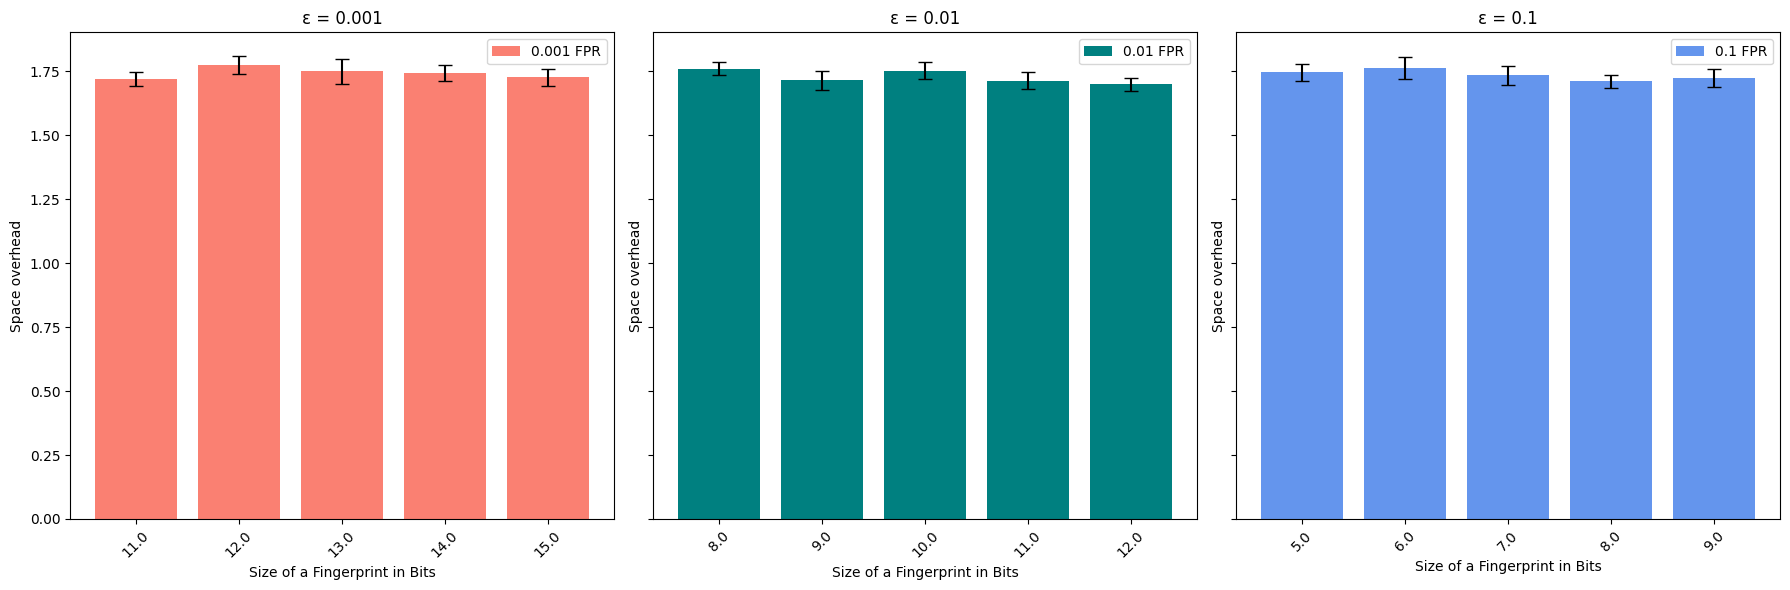

In [398]:
df = pd.read_csv('out/report/cuckoo_f_alpha.csv')

df.columns = ['FilterType', 'f', 'alpha', 'targetFpr', 'iteration']

grouped = df.groupby(['targetFpr', 'f']).alpha.agg(['mean', 'std']).reset_index()

fig, axes = plt.subplots(nrows=1, ncols=len(grouped['targetFpr'].unique()), figsize=(18, 6), sharey=True)
if len(grouped['targetFpr'].unique()) == 1:
    axes = [axes]


colors = ['salmon','teal','cornflowerblue']

for i, (ax, target_fpr) in enumerate(zip(axes, sorted(grouped['targetFpr'].unique()))):
    subset = grouped[grouped['targetFpr'] == target_fpr]
    ax.bar(subset['f'], 1 / subset['mean'], yerr=subset['std'], color=colors[i], capsize=5, label=f'{target_fpr} FPR')
    ax.set_title(f'ε = {target_fpr}')
    ax.set_xlabel('Size of a Fingerprint in Bits')
    ax.set_ylabel('Space overhead')
    ax.set_xticks(subset['f'])
    ax.set_xticklabels(subset['f'].astype(str), rotation=45)
    ax.legend()

plt.tight_layout()

plt.savefig("./out/cuckoo_f_alpha.png")

plt.show()

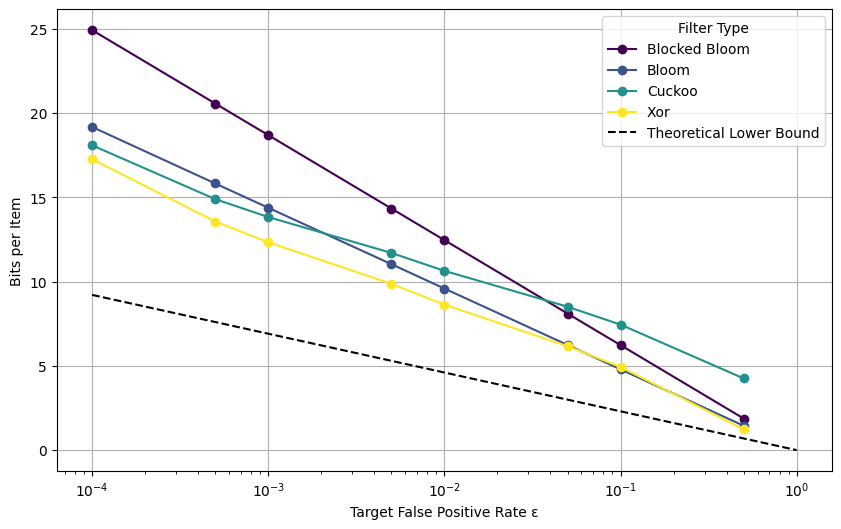

In [422]:
df = pd.read_csv('out/report/bpi_fpr.csv')

df['FilterType'] = df['FilterType'].astype(str)
df['fpr'] = df['fpr'].astype(float)
df['bpi'] = df['bpi'].astype(float)

# Group by FilterType and fpr to get the mean of bpi
grouped = df.groupby(['FilterType', 'fpr'])['bpi'].agg(mean='mean').reset_index()

# Get a list of unique filter types for consistent color mapping
unique_filters = grouped['FilterType'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_filters)))

# Create a dictionary to map each FilterType to a color
color_map = {ftype: colors[i] for i, ftype in enumerate(unique_filters)}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each filter type with its associated color
for ftype in unique_filters:
    filter_data = grouped[grouped['FilterType'] == ftype]
    if ftype == "Lower Bound":
        continue
    else:
        ax.plot(filter_data['fpr'], filter_data['mean'], '-o', label=ftype, color=color_map[ftype])

fpr_values = np.logspace(-4, 0, 400)  # Adjust range and density as needed for your data
lower_bound = np.log(1 / fpr_values)

# Add the lower bound plot
ax.plot(fpr_values, lower_bound, 'k--', label='Theoretical Lower Bound')

ax.set_xticks([0.0001,0.001,0.01,0.1], labels = [0.0001,0.001,0.01,0.1])
ax.set_xscale('log')
ax.set_xlabel('Target False Positive Rate ε')
ax.set_ylabel('Bits per Item')
ax.grid(True)
ax.legend(title='Filter Type')
plt.savefig("./out/bpi_fpr.png")
plt.show()

      FilterType      mean       std
0  Blocked Bloom  0.009852  0.000069
1          Bloom  0.010009  0.000087
2         Cuckoo  0.007535  0.000106
3            Xor  0.007851  0.000088


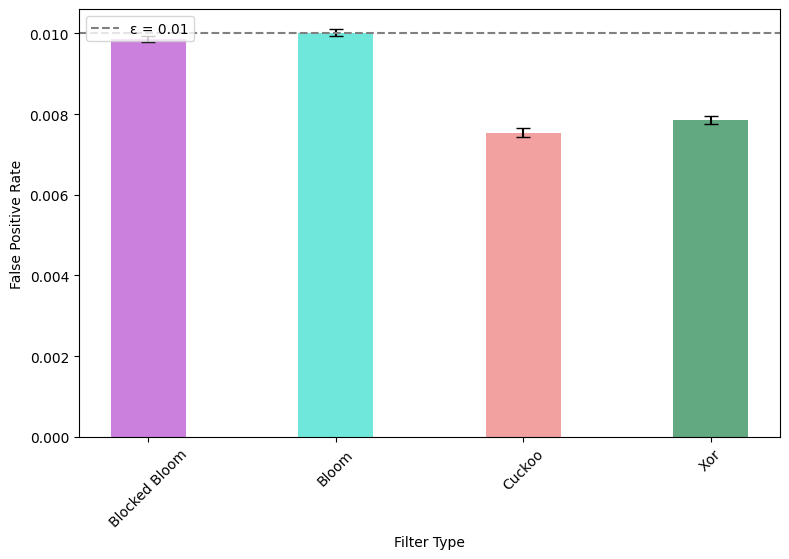

In [470]:
df = pd.read_csv('out/report/target_actual_fpr.csv')
df.columns = ['FilterType', 'actual', 'target', 'n', 'iteration']
df['FilterType'] = df['FilterType'].astype(str)
df['actual'] = df['actual'].astype(float)
df['target'] = df['target'].astype(float)

grouped_stats = df.groupby('FilterType')['actual'].agg(['mean', 'std']).reset_index()

print(grouped_stats)

# Set up the color map for each FilterType
colors = {'Bloom': 'turquoise', 'Cuckoo': 'lightcoral', 'Blocked Bloom': 'mediumorchid', 'Xor': 'seagreen'}
grouped_stats['color'] = grouped_stats['FilterType'].map(colors)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped_stats['FilterType'], grouped_stats['mean'], yerr=grouped_stats['std'], width = 0.4,
       color=grouped_stats['color'], capsize=5, alpha=0.75)

# Draw a line for the target FPR
ax.axhline(y=0.01, color='gray', linestyle='--', label='ε = 0.01')

# Adding labels and title
ax.set_xlabel('Filter Type')
ax.set_ylabel('False Positive Rate')
ax.legend(loc='upper left')

plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.tight_layout()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("./out/target_actual_fpr" + ".png")
plt.show()

      FilterType      mean       std
0  Blocked Bloom  0.011321  0.000117
1          Bloom  0.016001  0.000119
2         Cuckoo  0.014978  0.000108
3            Xor  0.015651  0.000129


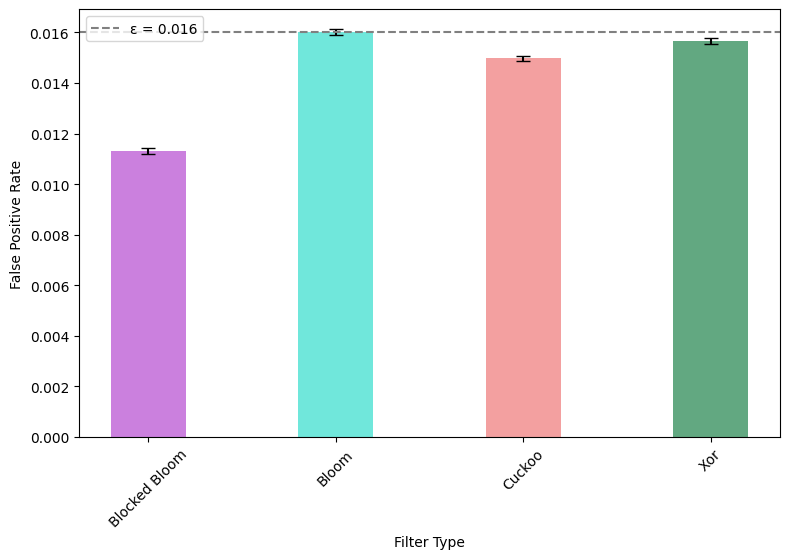

In [469]:
df = pd.read_csv('out/report/target_actual_fpr_fp.csv')
df.columns = ['FilterType', 'actual', 'target', 'n', 'iteration']
df['FilterType'] = df['FilterType'].astype(str)
df['actual'] = df['actual'].astype(float)
df['target'] = df['target'].astype(float)

grouped_stats = df.groupby('FilterType')['actual'].agg(['mean', 'std']).reset_index()

print(grouped_stats)

# Set up the color map for each FilterType
colors = {'Bloom': 'turquoise', 'Cuckoo': 'lightcoral', 'Blocked Bloom': 'mediumorchid', 'Xor': 'seagreen'}
grouped_stats['color'] = grouped_stats['FilterType'].map(colors)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped_stats['FilterType'], grouped_stats['mean'], yerr=grouped_stats['std'], width = 0.4,
       color=grouped_stats['color'], capsize=5, alpha=0.75)

# Draw a line for the target FPR
ax.axhline(y=0.016, color='gray', linestyle='--', label='ε = 0.016')

# Adding labels and title
ax.set_xlabel('Filter Type')
ax.set_ylabel('False Positive Rate')
ax.legend()

plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.tight_layout()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("./out/target_actual_fpr_fp" + ".png")
plt.show()

FilterType  Blocked Bloom      Bloom    Cuckoo       Xor
lf                                                      
0.00             1.319099   1.288874  0.198846  3.777490
0.25             1.714891  14.671067  6.522718  8.587043
0.50             0.224015   0.522313  1.741641  0.311645
0.75             2.710711   0.187903  1.202330  0.349896
1.00             6.095109   0.323431  1.311678  0.145246


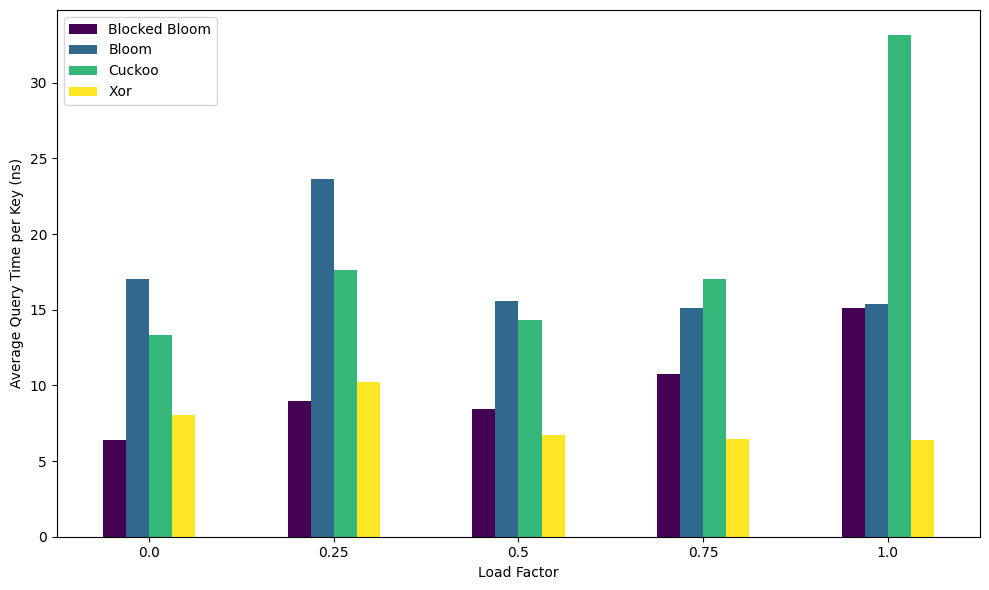

In [515]:
data = pd.read_csv('./out/report/lf_posQueryTime.csv')
grouped_data = data.groupby(['lf', 'FilterType']).agg(mean_time=('queryTime', 'mean'), std_time=('queryTime', 'std')).reset_index()
pivot_data = grouped_data.pivot(index='lf', columns='FilterType', values='mean_time')
# mean_pivot = grouped_data.pivot(index='loadFactor', columns='FilterType', values='mean_queryTime')
std_pivot = grouped_data.pivot(index='lf', columns='FilterType', values='std_time')

print(std_pivot)

fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='bar', ax=ax, colormap='viridis')


ax.set_xlabel('Load Factor')
ax.set_ylabel('Average Query Time per Key (ns)')
ax.set_xticklabels(pivot_data.index, rotation=0)  # Ensure load factor labels are readable
ax.legend()

plt.tight_layout()
plt.savefig('out/lf_posQueryTime.png')
plt.show()


FilterType  Blocked Bloom     Bloom    Cuckoo       Xor
lf                                                     
0.00             1.425255  0.089614  7.861069  0.788632
0.25            12.387534  0.957900  1.622747  0.474124
0.50            11.997131  2.368476  0.206621  0.150677
0.75             1.093480  0.619657  2.205420  0.135922
1.00             1.437729  0.498866  0.437335  2.019984


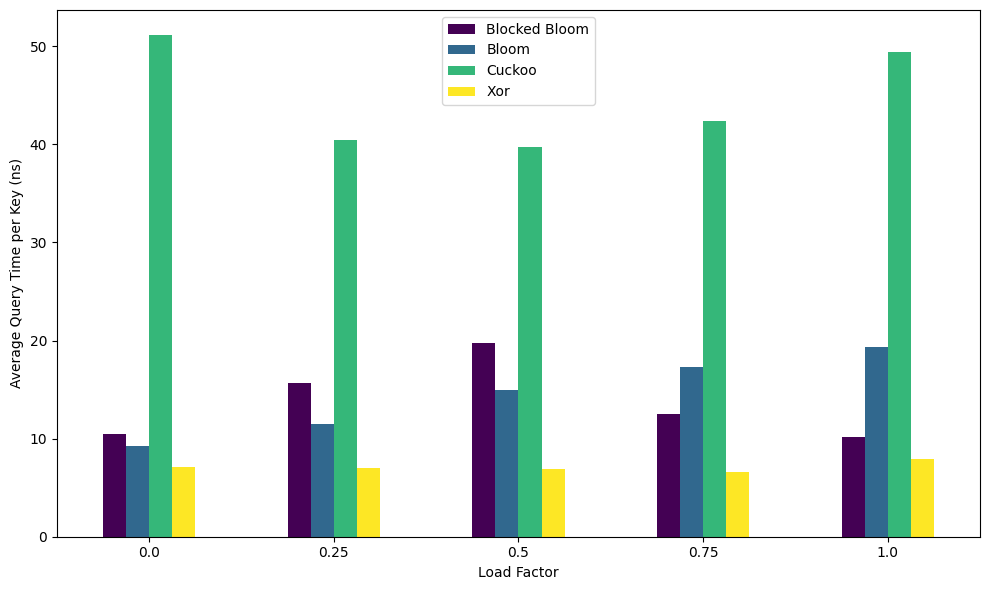

In [516]:
data = pd.read_csv('./out/report/lf_halfQueryTime.csv')
grouped_data = data.groupby(['lf', 'FilterType']).agg(mean_time=('queryTime', 'mean'), std_time=('queryTime', 'std')).reset_index()
pivot_data = grouped_data.pivot(index='lf', columns='FilterType', values='mean_time')
# mean_pivot = grouped_data.pivot(index='loadFactor', columns='FilterType', values='mean_queryTime')
std_pivot = grouped_data.pivot(index='lf', columns='FilterType', values='std_time')

print(std_pivot)

fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='bar', ax=ax, colormap='viridis')


ax.set_xlabel('Load Factor')
ax.set_ylabel('Average Query Time per Key (ns)')
ax.set_xticklabels(pivot_data.index, rotation=0)  # Ensure load factor labels are readable
ax.legend()

plt.tight_layout()
plt.savefig('out/lf_halfQueryTime.png')
plt.show()


FilterType  Blocked Bloom     Bloom     Cuckoo       Xor
lf                                                      
0.00             2.864970  0.262528   8.352492  3.665014
0.25             1.908422  0.311700  49.737981  0.482294
0.50             2.627789  1.122720  32.886681  0.182534
0.75             1.337471  1.561645   1.754696  0.572753
1.00             2.472031  3.195689   1.172866  0.477055


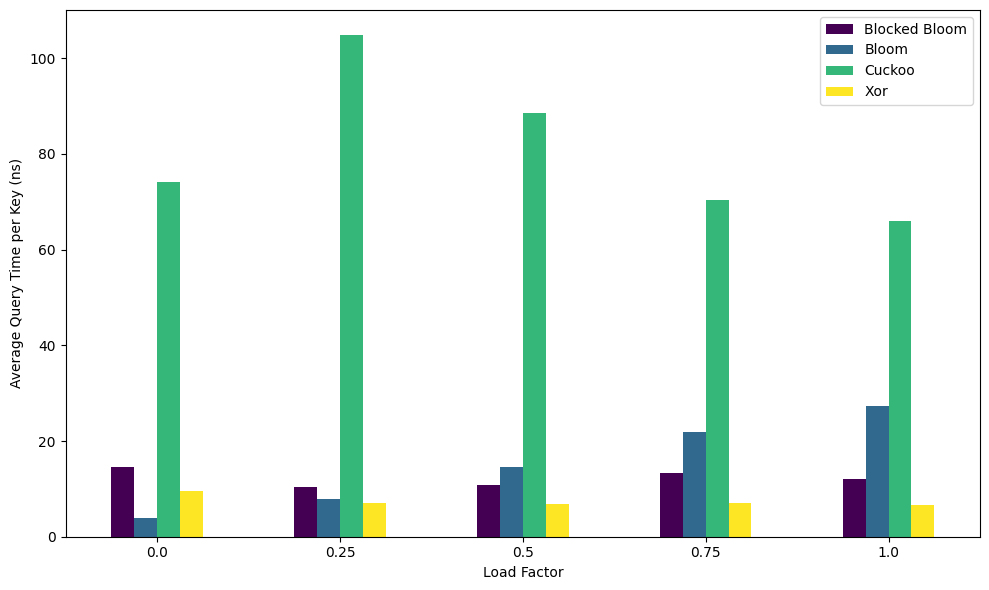

In [517]:
data = pd.read_csv('./out/report/lf_negQueryTime.csv')
grouped_data = data.groupby(['lf', 'FilterType']).agg(mean_time=('queryTime', 'mean'), std_time=('queryTime', 'std')).reset_index()
pivot_data = grouped_data.pivot(index='lf', columns='FilterType', values='mean_time')
# mean_pivot = grouped_data.pivot(index='loadFactor', columns='FilterType', values='mean_queryTime')
std_pivot = grouped_data.pivot(index='lf', columns='FilterType', values='std_time')

print(std_pivot)

fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='bar', ax=ax, colormap='viridis')


ax.set_xlabel('Load Factor')
ax.set_ylabel('Average Query Time per Key (ns)')
ax.set_xticklabels(pivot_data.index, rotation=0)  # Ensure load factor labels are readable
ax.legend()

plt.tight_layout()
plt.savefig('out/lf_negQueryTime.png')
plt.show()


FilterType  Blocked Bloom     Bloom     Cuckoo         Xor
fpr                                                       
0.001            4.143537  8.154267  20.971297   68.914913
0.010            1.075892  8.743978   7.700168   32.809499
0.100            2.104831  0.157782  14.151369  163.324350


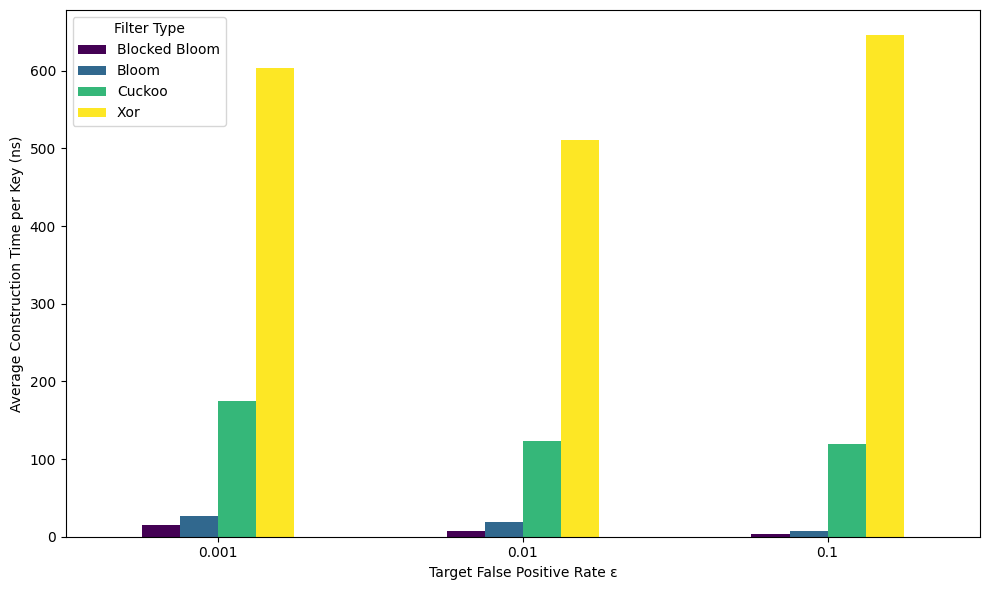

In [499]:
data = pd.read_csv('./out/report/buildTime_n.csv')
grouped_data = data.groupby(['fpr', 'FilterType']).agg(mean_time=('constTime', 'mean'), std_time=('constTime', 'std')).reset_index()
pivot_data = grouped_data.pivot(index='fpr', columns='FilterType', values='mean_time')
# mean_pivot = grouped_data.pivot(index='loadFactor', columns='FilterType', values='mean_queryTime')
std_pivot = grouped_data.pivot(index='fpr', columns='FilterType', values='std_time')

print(std_pivot)

fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='bar', ax=ax, colormap='viridis')


ax.set_xlabel('Target False Positive Rate ε')
ax.set_ylabel('Average Construction Time per Key (ns)')
ax.set_xticklabels(pivot_data.index, rotation=0)  # Ensure load factor labels are readable
ax.legend(title='Filter Type')

plt.tight_layout()
plt.savefig('out/buildTime_n.png')
plt.show()


In [498]:
df = pd.read_csv('out/report/buildTime_n.csv')
print(df)
df.columns = ['FilterType', 'n', 'constTime', 'fpr', 'iteration']

grouped = df.groupby(['FilterType', 'fpr']).agg(average_time=('constTime', 'mean'), std_time=('constTime', 'std')).reset_index()
print(grouped)

    FilterType          n   constTime   fpr  iteration
0        Bloom  1000000.0   26.339500  0.01          1
1        Bloom  1000000.0   35.966834  0.01          2
2        Bloom  1000000.0   32.208708  0.01          3
3        Bloom  1000000.0   15.090709  0.01          4
4        Bloom  1000000.0   14.077792  0.01          5
..         ...        ...         ...   ...        ...
115        Xor  1000000.0  615.292000  0.10          6
116        Xor  1000000.0  612.863125  0.10          7
117        Xor  1000000.0  533.083875  0.10          8
118        Xor  1000000.0  500.612625  0.10          9
119        Xor  1000000.0  510.909792  0.10         10

[120 rows x 5 columns]
       FilterType    fpr  average_time    std_time
0   Blocked Bloom  0.001     15.046425    4.143537
1   Blocked Bloom  0.010      7.782708    1.075892
2   Blocked Bloom  0.100      3.986621    2.104831
3           Bloom  0.001     26.931775    8.154267
4           Bloom  0.010     19.287688    8.743978
5         

In [519]:
df = pd.read_csv('out/report/xor_hash_attempt.csv')
print(df)
# df.columns = ['FilterType', 'b', 'failure', 'n', 'calculated']

grouped = df.groupby(['FilterType']).agg(mean_fails=('fails', 'mean'), std_fails=('fails','std')).reset_index()
print(grouped)

   FilterType          n  fails  percent  n.1
0       Local  1000000.0   39.0      0.0    0
1      Global  1000000.0   48.0      0.0    0
2       Local  1000000.0   32.0      0.0    1
3      Global  1000000.0   45.0      0.0    1
4       Local  1000000.0   35.0      0.0    2
5      Global  1000000.0   39.0      0.0    2
6       Local  1000000.0   46.0      0.0    3
7      Global  1000000.0   39.0      0.0    3
8       Local  1000000.0   45.0      0.0    4
9      Global  1000000.0   33.0      0.0    4
10      Local  1000000.0   41.0      0.0    5
11     Global  1000000.0   53.0      0.0    5
12      Local  1000000.0   50.0      0.0    6
13     Global  1000000.0   49.0      0.0    6
14      Local  1000000.0   50.0      0.0    7
15     Global  1000000.0   42.0      0.0    7
16      Local  1000000.0   42.0      0.0    8
17     Global  1000000.0   43.0      0.0    8
18      Local  1000000.0   41.0      0.0    9
19     Global  1000000.0   43.0      0.0    9
  FilterType  mean_fails  std_fail

In [521]:
df = pd.read_csv('out/report/xor_constTime.csv')
print(df)
# df.columns = ['FilterType', 'b', 'failure', 'n', 'calculated']

grouped = df.groupby(['FilterType']).agg(mean_fails=('constTime', 'mean'), std_fails=('constTime','std')).reset_index()
print(grouped)

   FilterType   fpr   constTime  targetFpr  iteration
0       Local  0.01  520.726167        0.0          0
1       Local  0.01  508.652292        0.0          1
2       Local  0.01  524.145000        0.0          2
3       Local  0.01  519.225166        0.0          3
4       Local  0.01  515.338125        0.0          4
5       Local  0.01  521.376500        0.0          5
6       Local  0.01  537.661250        0.0          6
7       Local  0.01  512.324458        0.0          7
8       Local  0.01  513.998208        0.0          8
9       Local  0.01  511.165125        0.0          9
10      Local  0.01  514.958916        0.0         10
11      Local  0.01  512.526459        0.0         11
12      Local  0.01  549.060916        0.0         12
13      Local  0.01  512.768333        0.0         13
14      Local  0.01  509.783458        0.0         14
15     Global  0.01  532.588250        0.0          0
16     Global  0.01  528.524084        0.0          1
17     Global  0.01  518.600

In [523]:
df = pd.read_csv('out/report/xor_queryTime.csv')
print(df)
# df.columns = ['FilterType', 'b', 'failure', 'n', 'calculated']

grouped = df.groupby(['FilterType']).agg(mean_time=('constTime', 'mean'), std_time=('constTime','std')).reset_index()
print(grouped)

   FilterType   fpr  constTime  targetFpr  iteration
0       Local  0.01   8.654709        0.0          0
1       Local  0.01  13.604833        0.0          1
2       Local  0.01  12.767042        0.0          2
3       Local  0.01   7.927875        0.0          3
4       Local  0.01   7.438833        0.0          4
5       Local  0.01   7.130042        0.0          5
6       Local  0.01   7.854209        0.0          6
7       Local  0.01   7.287542        0.0          7
8       Local  0.01   7.167791        0.0          8
9       Local  0.01   6.865250        0.0          9
10      Local  0.01   6.829834        0.0         10
11      Local  0.01   7.024667        0.0         11
12      Local  0.01   7.109084        0.0         12
13      Local  0.01   7.166834        0.0         13
14      Local  0.01   6.738209        0.0         14
15     Global  0.01  12.867958        0.0          0
16     Global  0.01  14.035708        0.0          1
17     Global  0.01   8.001334        0.0     

In [527]:
df = pd.read_csv('out/report/xor_fpr.csv')
print(df)
# df.columns = ['FilterType', 'b', 'failure', 'n', 'calculated']

grouped = df.groupby(['FilterType']).agg(mean_time=('fpr', 'mean'), std_time=('fpr','std')).reset_index()
print(grouped)

   FilterType          n       fpr  targetFpr  iteration
0       Local  1000000.0  0.007758       0.01          0
1      Global  1000000.0  0.007802       0.01          0
2       Local  1000000.0  0.007763       0.01          1
3      Global  1000000.0  0.007731       0.01          1
4       Local  1000000.0  0.007668       0.01          2
5      Global  1000000.0  0.007764       0.01          2
6       Local  1000000.0  0.007846       0.01          3
7      Global  1000000.0  0.007925       0.01          3
8       Local  1000000.0  0.007895       0.01          4
9      Global  1000000.0  0.007946       0.01          4
10      Local  1000000.0  0.007761       0.01          5
11     Global  1000000.0  0.007672       0.01          5
12      Local  1000000.0  0.007806       0.01          6
13     Global  1000000.0  0.008045       0.01          6
14      Local  1000000.0  0.007800       0.01          7
15     Global  1000000.0  0.007845       0.01          7
16      Local  1000000.0  0.007

In [534]:
df = pd.read_csv('out/report/lf_posQueryTime.csv')
print(df)
# df.columns = ['FilterType', 'b', 'failure', 'n', 'calculated']

grouped = df.groupby(['FilterType']).agg(mean_time=('queryTime', 'mean'), std_time=('queryTime','std')).reset_index()
print(grouped)

        FilterType   lf  queryTime          n  iteration
0    Blocked Bloom  0.0     9.3916  1000000.0          1
1    Blocked Bloom  0.0     6.7250  1000000.0          2
2    Blocked Bloom  0.0     7.8625  1000000.0          3
3    Blocked Bloom  0.0     6.3958  1000000.0          4
4    Blocked Bloom  0.0     6.0041  1000000.0          5
..             ...  ...        ...        ...        ...
195            Xor  1.0     6.3292  1000000.0          6
196            Xor  1.0     6.3458  1000000.0          7
197            Xor  1.0     6.3458  1000000.0          8
198            Xor  1.0     6.3334  1000000.0          9
199            Xor  1.0     6.3625  1000000.0         10

[200 rows x 5 columns]
      FilterType  mean_time  std_time
0  Blocked Bloom    9.93083  4.222273
1          Bloom   17.34816  7.100766
2         Cuckoo   19.07834  7.883415
3            Xor    7.57641  4.285867


In [535]:
df = pd.read_csv('out/report/lf_halfQueryTime.csv')
print(df)
# df.columns = ['FilterType', 'b', 'failure', 'n', 'calculated']

grouped = df.groupby(['FilterType']).agg(mean_time=('queryTime', 'mean'), std_time=('queryTime','std')).reset_index()
print(grouped)

    FilterType   lf  queryTime          n  iteration
0        Bloom  0.0     9.3625  1000000.0          1
1        Bloom  0.0     9.2334  1000000.0          2
2        Bloom  0.0     9.2167  1000000.0          3
3        Bloom  0.0     9.1792  1000000.0          4
4        Bloom  0.0     9.3417  1000000.0          5
..         ...  ...        ...        ...        ...
195        Xor  1.0     7.0042  1000000.0          6
196        Xor  1.0     8.9083  1000000.0          7
197        Xor  1.0     6.6917  1000000.0          8
198        Xor  1.0     6.6584  1000000.0          9
199        Xor  1.0     6.9166  1000000.0         10

[200 rows x 5 columns]
      FilterType  mean_time  std_time
0  Blocked Bloom  13.730002  8.294634
1          Bloom  14.441254  3.891438
2         Cuckoo  44.609654  5.959958
3            Xor   7.115670  1.054848


In [536]:
df = pd.read_csv('out/report/lf_negQueryTime.csv')
print(df)
# df.columns = ['FilterType', 'b', 'failure', 'n', 'calculated']

grouped = df.groupby(['FilterType']).agg(mean_time=('queryTime', 'mean'), std_time=('queryTime','std')).reset_index()
print(grouped)

    FilterType   lf  queryTime          n  iteration
0        Bloom  0.0     4.6208  1000000.0          1
1        Bloom  0.0     3.8916  1000000.0          2
2        Bloom  0.0     3.8125  1000000.0          3
3        Bloom  0.0     3.7792  1000000.0          4
4        Bloom  0.0     3.7208  1000000.0          5
..         ...  ...        ...        ...        ...
195        Xor  1.0     6.4958  1000000.0          6
196        Xor  1.0     6.8917  1000000.0          7
197        Xor  1.0     6.4791  1000000.0          8
198        Xor  1.0     6.4750  1000000.0          9
199        Xor  1.0     6.4917  1000000.0         10

[200 rows x 5 columns]
      FilterType  mean_time   std_time
0  Blocked Bloom  12.197256   2.697253
1          Bloom  15.113908   8.923777
2         Cuckoo  80.808582  29.532258
3            Xor   7.429754   1.955131
